In [289]:

#print(os.getcwd())
category = pd.read_csv("/Users/booknfoto/Desktop/dataset/[Track1_데이터1] mrc_info.csv", encoding="euc-kr")
train = pd.read_csv("/Users/booknfoto/Desktop/dataset/[Track1_데이터2] samp_train.csv", encoding="euc-kr")
samp = pd.read_csv("/Users/booknfoto/Desktop/dataset/[Track1_데이터3] samp_cst_feat.csv", encoding="euc-kr")
trend = pd.read_csv("/Users/booknfoto/Desktop/dataset/[Track2_데이터1] trend_w_demo.csv", encoding="euc-kr")
trend



,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low
...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,E,low,mid,low,low,low,low
452034,201904,할인점,0,H,high,low,low,low,low,low
452035,201904,할인점,1,H,high,low,low,low,low,low
452036,201904,할인점,0,H,high,low,low,low,low,low


In [62]:
df1 = pd.merge(samp,train, on= "cst_id_di")
#samp
#train
df1.head(3)

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,MRC_ID_DI
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,...,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,...,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717,8
2,90000000210,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,...,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962,0


In [49]:
#데이터 개괄 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10124 entries, 0 to 10123
Columns: 228 entries, cst_id_di to MRC_ID_DI
dtypes: float64(198), int64(30)
memory usage: 17.7 MB


In [58]:
#데이터 널값 확인
missing_df = df1.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] /df1.shape[0]
missing_df.loc[missing_df['ratio'] != 0]


,column,count,ratio


In [95]:
#종속변수 체크
import matplotlib.pyplot as plt
df1['MRC_ID_DI'].value_counts()

0     8200
7      661
6      554
8      337
5      143
1       85
9       59
3       32
10      28
2       14
4       11
Name: MRC_ID_DI, dtype: int64

In [104]:
df1['label'] = [1 if s > 0 else 0 for s in df1['MRC_ID_DI']] 
df1['label'].value_counts()

0    8200
1    1924
Name: label, dtype: int64

In [115]:
pd.pivot_table(df1, index = ['label'],aggfunc = 'mean')

,MRC_ID_DI,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,cst_id_di,var178
label,,,,,,,,,,,,,,,,,,,,,
0,0.00000,-0.000954,0.522545,0.052767,-0.040540,0.213861,0.165854,0.502712,0.068857,0.487807,...,-0.037691,-0.036329,-0.104435,-0.038285,-0.015856,-0.025970,-0.056926,0.144836,9.000023e+10,0.490404
1,6.45842,-0.016376,0.320887,-0.059132,0.045345,0.008269,0.068087,0.483979,-0.078990,0.655482,...,0.051772,0.040775,0.214099,0.047283,0.002055,0.039852,0.174319,-0.043852,9.000023e+10,0.534082


In [116]:
pd.pivot_table(df1, index = ['label'],aggfunc = 'sum')

,MRC_ID_DI,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,...,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,cst_id_di,var178
label,,,,,,,,,,,,,,,,,,,,,
0,0,-7.82365,4284.8718,432.68931,-332.42794,1753.66341,1360,4122.2382,564.62460,4000.0142,...,-309.06262,-297.89713,-856.37101,-313.93405,-130.01716,-212.95028,-466.79173,1187.65282,738001873446410,4021.3117
1,12426,-31.50699,617.3857,-113.77002,87.24422,15.91023,131,931.1759,-151.97743,1261.1477,...,99.60911,78.45189,411.92685,90.97260,3.95300,76.67603,335.38982,-84.37211,173160441532680,1027.5735


In [250]:
df2 = df1.iloc[:,1:227]
df2

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,...,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,...,-0.23729,0.19437,0.06538,0.16309,0.30207,0.06053,-0.01107,0.12413,0.29702,-0.31717
2,-0.01048,0.8360,0.37797,-0.10970,0.52032,1,0.3257,0.32632,0.7343,0.73494,...,0.53283,-0.52084,-0.18568,-0.09755,-0.56565,-0.17840,-0.06314,-0.17111,-0.32239,0.33962
3,0.05194,0.7505,0.04611,-0.16512,0.07413,0,0.5322,0.26845,0.7327,0.32617,...,0.20754,-0.01934,-0.05172,-0.13245,-0.16357,-0.05697,0.01587,-0.04022,0.31213,-0.00559
4,-0.08536,0.3767,-0.12288,0.10023,-0.43414,0,0.5468,-0.25575,0.9644,-0.52948,...,-0.42251,0.23122,0.07913,0.09206,0.46971,0.07964,-0.04698,0.03581,0.22588,-0.34868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,-0.06606,0.6615,-0.09743,-0.03240,0.10111,0,0.9722,-0.02041,0.6966,0.06993,...,-0.19780,0.33881,-0.01692,-0.01823,0.21720,-0.08346,-0.07835,0.02321,0.32967,-0.25995
10120,-0.03031,0.0143,0.07041,-0.02519,0.58013,0,0.0330,0.06676,0.8251,0.68992,...,0.09259,-0.19384,-0.02383,-0.02448,-0.05019,-0.02869,-0.05401,0.01670,-0.15880,0.48301
10121,-0.05351,0.3121,0.36925,-0.10039,0.51159,0,0.2582,0.35016,0.4638,0.68799,...,0.46478,-0.45312,-0.17163,-0.08674,-0.40260,-0.15903,-0.10292,-0.11742,-0.31895,0.40357
10122,-0.00562,0.2286,0.04581,-0.05390,0.20481,0,0.5957,0.11319,0.2527,0.42924,...,0.10340,0.01754,-0.01479,-0.03898,-0.01363,0.06974,-0.03815,-0.04371,0.11433,-0.01931


In [264]:
from imblearn.under_sampling import *
df3 = df1.iloc[:,1:227]
pd.pivot_table(df3, index = df1['label'], aggfunc = 'count')

,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,var178
label,,,,,,,,,,,,,,,,,,,,,
0,8200,8200,8200,8200,8200,8200,8200,8200,8200,8200,...,8200,8200,8200,8200,8200,8200,8200,8200,8200,8200
1,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,...,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924


In [265]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(df3, df1['label'])

pd.pivot_table(X_samp, index = y_samp, aggfunc = 'count')




,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,...,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,var178
label,,,,,,,,,,,,,,,,,,,,,
0,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,...,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924
1,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,...,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924


In [277]:
#data분리

#df2 #클래스 1:1 비율 안맞춘거
#X_samp #클래스 1:1 비율 맞춘거 X_samp, index = y_samp
#다중 클래스 df1['MRC_ID_DI']
#이분류 클래스  df1['label']

from sklearn.model_selection import train_test_split
#x_train_all, x_test, y_train_all, y_test = train_test_split(df2, df1['MRC_ID_DI'], test_size=0.2, random_state=77,stratify=df1['MRC_ID_DI'])
#클래스 비율 안맞춤
#x_train_all, x_test, y_train_all, y_test = train_test_split(df2, df1['label'], test_size=0.2, random_state=77,stratify=df1['label'])
#클래스 비율 맞춤
x_train_all, x_test, y_train_all, y_test = train_test_split(X_samp, y_samp, test_size=0.2, random_state=77,stratify=y_samp)


#validation dataset 분류  x , X_train_all
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.22, random_state=77, stratify=y_train_all)


In [278]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

param_grid = {
    "C":np.logspace(-3,3,7),
    'penalty': ['l1','l2'],
    'random_state' : [77] 
}

clf = LogisticRegression(random_state=77)
clf = GridSearchCV(clf, param_grid=param_grid) 
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
y_predt = clf.predict(x_train)
print("로지스틱 회귀 훈련 정확도: {:.3f}".format(accuracy_score(y_predt, y_train)))
y_pred = clf.predict(x_val)
print("로지스틱 회귀 검증 정확도: {:.3f}".format(accuracy_score(y_pred, y_val)))
y_pred = clf.predict(x_test)
print("로지스틱 회귀 테스트 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("로지스틱 회귀 테스트 f1: {:.3f}".format(f1_score(y_pred, y_test, average='weighted')))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

{'C': 10.0, 'penalty': 'l2', 'random_state': 77}
0.7833333333333334
로지스틱 회귀 훈련 정확도: 0.829
로지스틱 회귀 검증 정확도: 0.816
로지스틱 회귀 테스트 정확도: 0.791
로지스틱 회귀 테스트 f1: 0.791
Predicted    0    1
Actual             
0          291   94
1           67  318
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       385
           1       0.77      0.83      0.80       385

    accuracy                           0.79       770
   macro avg       0.79      0.79      0.79       770
weighted avg       0.79      0.79      0.79       770



In [279]:
import seaborn as sn

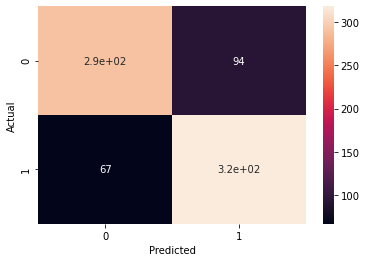

In [280]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [281]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       385
           1       0.77      0.83      0.80       385

    accuracy                           0.79       770
   macro avg       0.79      0.79      0.79       770
weighted avg       0.79      0.79      0.79       770



In [282]:
import statsmodels.api as sm
lgt = sm.Logit(df1['label'],df2)
result = lgt.fit()

         Current function value: 0.287261
         Iterations: 35


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [283]:
result.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                10124
Model:                          Logit   Df Residuals:                     9899
Method:                           MLE   Df Model:                          224
Date:                Fri, 11 Dec 2020   Pseudo R-squ.:                  0.4093
Time:                        21:17:04   Log-Likelihood:                -2908.2
converged:                      False   LL-Null:                       -4923.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
VAR002         0.6300      0.712      0.885      0.376      -0.766       2.026
VAR003        -1.3266      0.212     -6.262      0.000      -1.742      -0.911
VAR004        -6.7817      3.534     -1.919      0.055     -13.708       0.144
VAR005        -0.1424      0.624     -0.228      0.820      -1.366       1.081
VAR006        -5.9594      3.851     -1.547      0.122     -13.508       1.589
VAR007        -6.5307        nan        nan        nan         nan         nan
VAR008        -0.0775      0.121     -0.638      0.524      -0.316       0.161
VAR009        11.7703      3.198      3.681      0.000       5.503      18.038
VAR010         0.2516      0.178      1.415      0.157      -0.097       0.600
VAR011        19.6019      6.397      3.064      0.002       7.063      32.140
VAR012        -1.9076     10.762     -0.177      0.859     -23.001      19.186
VAR013        -6.4866      7.472     -0.868      0.385     -21.131       8.158
VAR014         9.0127     10.265      0.878      0.380     -11.105      29.131
VAR015        -0.0578      0.090     -0.640      0.522      -0.235       0.119
VAR016         0.3917      0.289      1.356      0.175      -0.175       0.958
VAR017        -0.4235      0.301     -1.407      0.160      -1.014       0.167
VAR018        -6.1334        nan        nan        nan         nan         nan
VAR019        -0.9144      1.966     -0.465      0.642      -4.768       2.939
VAR020         0.1535      0.634      0.242      0.809      -1.089       1.396
VAR021         2.2511      2.593      0.868      0.385      -2.831       7.333
VAR022        -8.5347      5.051     -1.690      0.091     -18.434       1.365
VAR023         0.7019      0.520      1.350      0.177      -0.317       1.721
VAR024       -18.7840      8.280     -2.269      0.023     -35.012      -2.556
VAR025         7.0991      2.363      3.005      0.003       2.468      11.730
VAR026         0.2009      0.245      0.820      0.412      -0.279       0.681
VAR027        16.6514      5.837      2.853      0.004       5.211      28.092
VAR028        -0.4389      7.320     -0.060      0.952     -14.786      13.908
VAR029        -5.3971      2.002     -2.696      0.007      -9.320      -1.474
VAR030        -0.1241      0.580     -0.214      0.830      -1.261       1.012
VAR031         0.3173      0.181      1.756      0.079      -0.037       0.671
VAR032        22.0257     10.977      2.007      0.045       0.511      43.540
VAR033         1.1173      0.646      1.728      0.084      -0.150       2.384
VAR034        -7.3578      2.952     -2.493      0.013     -13.143      -1.572
VAR035        -7.5018      3.956     -1.896      0.058     -15.256       0.252
VAR036         0.2939      0.139      2.114      0.034       0.021       0.566
VAR037        -3.4827      1.895     -1.837      0.066      -7.198       0.232
VAR038        -3.5243      4.977     -0.708      0.479     -13.278       6.229
VAR039       -11.6924     10.347     -1.130      0.258     -31.972       8.587
VA

In [284]:
type(result.pvalues)

pandas.core.series.Series

In [285]:
rst = pd.DataFrame(result.pvalues)
rst.sort_values(by=[0], ascending=False).head(100).index

Index(['VAR051', 'VAR176', 'VAR172', 'VAR177', 'VAR077', 'VAR208', 'VAR096',
       'VAR148', 'VAR071', 'VAR145', 'VAR098', 'VAR094', 'VAR143', 'VAR183',
       'VAR166', 'VAR154', 'VAR062', 'VAR028', 'VAR196', 'VAR190', 'VAR152',
       'VAR146', 'VAR105', 'VAR147', 'VAR131', 'VAR169', 'VAR012', 'VAR066',
       'VAR206', 'VAR224', 'VAR030', 'VAR142', 'VAR050', 'VAR005', 'VAR201',
       'VAR020', 'VAR213', 'VAR175', 'VAR080', 'VAR087', 'VAR202', 'VAR040',
       'VAR068', 'VAR088', 'VAR159', 'VAR048', 'VAR123', 'VAR151', 'VAR125',
       'VAR181', 'VAR134', 'VAR075', 'VAR019', 'VAR044', 'VAR218', 'VAR133',
       'VAR167', 'VAR116', 'VAR209', 'VAR055', 'VAR193', 'VAR137', 'VAR008',
       'VAR015', 'VAR149', 'VAR165', 'VAR171', 'VAR038', 'VAR118', 'VAR045',
       'VAR057', 'VAR120', 'VAR112', 'VAR108', 'VAR052', 'VAR221', 'VAR215',
       'VAR117', 'VAR095', 'VAR026', 'VAR100', 'VAR086', 'VAR073', 'VAR013',
       'VAR021', 'VAR223', 'var178', 'VAR014', 'VAR002', 'VAR054', 'VAR158',

In [286]:
#p값이 너무 높은 변수 제거하기
df2 = df1.iloc[:,1:227]
df4 = df2.drop(['VAR002','VAR005','VAR008','VAR012','VAR020'], axis =1)

In [287]:
from sklearn.model_selection import train_test_split
#x_train_all, x_test, y_train_all, y_test = train_test_split(df2, df1['MRC_ID_DI'], test_size=0.2, random_state=77,stratify=df1['MRC_ID_DI'])
x_train_all, x_test, y_train_all, y_test = train_test_split(df4, df1['label'], test_size=0.2, random_state=77,stratify=df1['label'])

#validation dataset 분류  x , X_train_all
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.22, random_state=77, stratify=y_train_all)

In [288]:

param_grid = {
    "C":np.logspace(-3,3,7),
    'penalty': ['l1','l2'],
    'random_state' : [77] 
}

clf = LogisticRegression(random_state=77)
clf = GridSearchCV(clf, param_grid=param_grid) 
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
y_predt = clf.predict(x_train)
print("로지스틱 회귀 훈련 정확도: {:.3f}".format(accuracy_score(y_predt, y_train)))
y_pred = clf.predict(x_val)
print("로지스틱 회귀 검증 정확도: {:.3f}".format(accuracy_score(y_pred, y_val)))
y_pred = clf.predict(x_test)
print("로지스틱 회귀 테스트 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("로지스틱 회귀 테스트 f1: {:.3f}".format(f1_score(y_pred, y_test, average='weighted')))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

{'C': 100.0, 'penalty': 'l2', 'random_state': 77}
0.8494557864036804
로지스틱 회귀 훈련 정확도: 0.869
로지스틱 회귀 검증 정확도: 0.857
로지스틱 회귀 테스트 정확도: 0.854
로지스틱 회귀 테스트 f1: 0.861
Predicted     0    1
Actual              
0          1533  107
1           188  197
